### Name: Che-Wei Yeh
### USCID: 7415538737
### Github ID: Boximao

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn import metrics
from collections import Counter
from scipy.spatial.distance import hamming
from matplotlib import image

### 1

### (a)

In [2]:
data=pd.read_csv('..//data//Frogs_MFCCs.csv')
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
X=data.iloc[:,:-4]
y=data.iloc[:,-4:-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=71)

In [4]:
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)
df_test


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
6230,1.000000,0.544568,0.412623,0.179622,0.027478,0.172294,0.076285,-0.083501,0.083156,0.078102,...,0.091233,-0.019597,-0.041886,0.013136,-0.036275,-0.007001,0.046989,Hylidae,Hypsiboas,HypsiboasCordobae
327,1.000000,0.560954,0.563507,0.564974,-0.156246,-0.090553,0.444713,0.110427,-0.230410,0.169904,...,-0.172519,0.080914,0.087475,-0.159477,-0.058481,0.115102,0.000662,Leptodactylidae,Adenomera,AdenomeraAndre
1111,1.000000,0.339559,0.194531,0.380630,0.068137,0.092436,0.183722,0.054697,-0.138092,0.002431,...,-0.171143,-0.165396,0.076539,0.061823,-0.114970,-0.085833,0.008605,Dendrobatidae,Ameerega,Ameeregatrivittata
5329,0.638206,0.887281,0.995955,1.000000,-0.033971,-0.002725,0.033027,0.277062,-0.035775,-0.414806,...,0.343127,-0.076856,0.430764,0.364593,0.081973,-0.184345,-0.269900,Hylidae,Hypsiboas,HypsiboasCinerascens
5499,1.000000,0.135635,0.295455,0.319752,0.187688,0.142162,0.121144,-0.101734,-0.092789,0.079776,...,-0.011940,0.106410,0.029436,0.003567,0.012655,-0.046606,-0.038367,Hylidae,Hypsiboas,HypsiboasCordobae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,1.000000,0.766848,0.761217,0.454927,-0.008135,0.228177,0.022602,0.142533,0.290178,-0.225708,...,0.159816,-0.117387,-0.052750,-0.033675,0.074759,-0.029766,-0.218756,Hylidae,Hypsiboas,HypsiboasCinerascens
755,1.000000,0.238588,-0.132179,0.267992,0.497536,0.237624,-0.175529,-0.215625,0.071511,0.250108,...,-0.033285,-0.150162,-0.064397,0.070353,0.076379,-0.014067,-0.094913,Dendrobatidae,Ameerega,Ameeregatrivittata
2075,1.000000,0.291384,0.197107,0.660704,0.110087,-0.041644,-0.137990,0.132583,0.299166,-0.023630,...,0.087176,0.279858,0.022767,-0.117887,-0.095049,0.083934,0.133824,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
7042,1.000000,0.383927,0.328891,0.254197,-0.010563,0.018501,0.157438,0.051771,-0.065978,0.035060,...,-0.018473,-0.003143,0.019885,0.011434,0.001896,-0.000804,0.001286,Bufonidae,Rhinella,Rhinellagranulosa


### (b)

#### (i)

In [5]:
# for exact match, one have to get all features labels classified correctly to be determined as correct.
# for hamming loss, it calculates the proportion of incorrectly predicted labels to the total number of labels.


#### (ii)

In [6]:
y1=df_train.iloc[:,-3]
y1

6534            Hylidae
5314            Hylidae
505     Leptodactylidae
2993    Leptodactylidae
3637    Leptodactylidae
             ...       
1320    Leptodactylidae
1576    Leptodactylidae
5175            Hylidae
3083    Leptodactylidae
4013    Leptodactylidae
Name: Family, Length: 5036, dtype: object

In [7]:
y2=df_train.iloc[:,-2]
y2

6534    Hypsiboas
5314    Hypsiboas
505     Adenomera
2993    Adenomera
3637    Adenomera
          ...    
1320    Adenomera
1576    Adenomera
5175    Hypsiboas
3083    Adenomera
4013    Adenomera
Name: Genus, Length: 5036, dtype: object

In [8]:
y3=df_train.iloc[:,-1]
y3

6534         HypsiboasCordobae
5314      HypsiboasCinerascens
505             AdenomeraAndre
2993    AdenomeraHylaedactylus
3637    AdenomeraHylaedactylus
                 ...          
1320    AdenomeraHylaedactylus
1576    AdenomeraHylaedactylus
5175      HypsiboasCinerascens
3083    AdenomeraHylaedactylus
4013    AdenomeraHylaedactylus
Name: Species, Length: 5036, dtype: object

In [9]:
X_train=df_train.iloc[:,:-3]
X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
6534,1.000000,0.219132,0.328145,0.276312,0.138941,0.161799,0.069704,-0.098882,-0.023238,0.060825,...,0.066786,-0.016536,-0.101417,0.016403,0.089075,0.012570,0.005598,0.012546,-0.020321,0.014343
5314,0.635731,0.632307,1.000000,0.344524,-0.187306,0.235220,0.092245,0.013496,0.322801,-0.083595,...,-0.078410,-0.079517,0.218090,0.183567,-0.044250,-0.125546,0.067645,0.012660,-0.073032,-0.128035
505,1.000000,0.530382,0.616610,0.608730,-0.120335,-0.016784,0.467498,0.109767,-0.338609,0.090561,...,-0.161660,0.165016,0.086154,-0.160323,0.022647,0.159589,-0.056293,-0.062159,0.066986,0.017538
2993,0.981064,0.606103,0.176967,1.000000,0.480269,-0.095092,-0.298701,0.113210,0.280621,0.128439,...,0.189006,0.191162,-0.089833,-0.250903,0.036806,0.121993,-0.046694,-0.284079,-0.212667,0.150678
3637,1.000000,0.472019,0.268260,0.522944,0.160224,-0.058994,-0.114757,0.122853,0.344404,0.071400,...,0.365263,0.074463,-0.268714,-0.023125,0.198666,0.136123,-0.011841,-0.150932,-0.062030,0.199363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,1.000000,0.247523,0.376352,0.485562,0.075750,0.062815,-0.081455,0.054212,0.277196,0.017867,...,0.247674,-0.266669,-0.216534,0.229878,0.188352,-0.096180,-0.100521,-0.011451,0.103837,0.142921
1576,1.000000,0.144101,0.086647,0.476742,0.166010,0.050815,-0.098781,0.022730,0.215022,0.060904,...,0.364573,-0.087076,-0.294147,0.049405,0.196495,0.049178,-0.134119,-0.169813,0.042758,0.259049
5175,1.000000,0.707606,0.727266,0.305837,-0.052068,0.226030,-0.011465,0.089876,0.239458,-0.275534,...,-0.119249,-0.174240,0.233601,0.016937,-0.133859,0.047101,0.037084,0.154445,0.101249,-0.122266
3083,1.000000,0.424845,0.260716,0.571191,0.177599,-0.010791,-0.168814,0.109850,0.324147,0.060682,...,0.301643,-0.084125,-0.233546,0.033673,0.229904,0.088279,-0.085665,-0.153165,0.076188,0.226170


In [10]:
y1_test=df_test.iloc[:,-3]
y1_test

6230            Hylidae
327     Leptodactylidae
1111      Dendrobatidae
5329            Hylidae
5499            Hylidae
             ...       
5163            Hylidae
755       Dendrobatidae
2075    Leptodactylidae
7042          Bufonidae
2035    Leptodactylidae
Name: Family, Length: 2159, dtype: object

In [11]:
y2_test=df_test.iloc[:,-2]
y2_test

6230    Hypsiboas
327     Adenomera
1111     Ameerega
5329    Hypsiboas
5499    Hypsiboas
          ...    
5163    Hypsiboas
755      Ameerega
2075    Adenomera
7042     Rhinella
2035    Adenomera
Name: Genus, Length: 2159, dtype: object

In [12]:
y3_test=df_test.iloc[:,-1]
y3_test 

6230         HypsiboasCordobae
327             AdenomeraAndre
1111        Ameeregatrivittata
5329      HypsiboasCinerascens
5499         HypsiboasCordobae
                 ...          
5163      HypsiboasCinerascens
755         Ameeregatrivittata
2075    AdenomeraHylaedactylus
7042         Rhinellagranulosa
2035    AdenomeraHylaedactylus
Name: Species, Length: 2159, dtype: object

In [13]:
X_test=df_test.iloc[:,:-3]
X_test

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
6230,1.000000,0.544568,0.412623,0.179622,0.027478,0.172294,0.076285,-0.083501,0.083156,0.078102,...,0.090684,-0.069694,0.008825,0.091233,-0.019597,-0.041886,0.013136,-0.036275,-0.007001,0.046989
327,1.000000,0.560954,0.563507,0.564974,-0.156246,-0.090553,0.444713,0.110427,-0.230410,0.169904,...,-0.172441,0.179377,0.010701,-0.172519,0.080914,0.087475,-0.159477,-0.058481,0.115102,0.000662
1111,1.000000,0.339559,0.194531,0.380630,0.068137,0.092436,0.183722,0.054697,-0.138092,0.002431,...,-0.257128,0.122804,0.178936,-0.171143,-0.165396,0.076539,0.061823,-0.114970,-0.085833,0.008605
5329,0.638206,0.887281,0.995955,1.000000,-0.033971,-0.002725,0.033027,0.277062,-0.035775,-0.414806,...,-0.071098,-0.074962,0.661947,0.343127,-0.076856,0.430764,0.364593,0.081973,-0.184345,-0.269900
5499,1.000000,0.135635,0.295455,0.319752,0.187688,0.142162,0.121144,-0.101734,-0.092789,0.079776,...,0.095712,0.005619,-0.099357,-0.011940,0.106410,0.029436,0.003567,0.012655,-0.046606,-0.038367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5163,1.000000,0.766848,0.761217,0.454927,-0.008135,0.228177,0.022602,0.142533,0.290178,-0.225708,...,-0.199074,-0.295366,0.289808,0.159816,-0.117387,-0.052750,-0.033675,0.074759,-0.029766,-0.218756
755,1.000000,0.238588,-0.132179,0.267992,0.497536,0.237624,-0.175529,-0.215625,0.071511,0.250108,...,-0.118090,0.115752,0.143441,-0.033285,-0.150162,-0.064397,0.070353,0.076379,-0.014067,-0.094913
2075,1.000000,0.291384,0.197107,0.660704,0.110087,-0.041644,-0.137990,0.132583,0.299166,-0.023630,...,0.450314,-0.152615,-0.342697,0.087176,0.279858,0.022767,-0.117887,-0.095049,0.083934,0.133824
7042,1.000000,0.383927,0.328891,0.254197,-0.010563,0.018501,0.157438,0.051771,-0.065978,0.035060,...,-0.028349,0.043628,0.030128,-0.018473,-0.003143,0.019885,0.011434,0.001896,-0.000804,0.001286


In [14]:
# Support vector machine model from scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# find the minimum C for y1
model=svm.SVC(kernel='rbf',C=0.01,random_state=71)
score=cross_val_score(model,X_train,y1,cv=10)
score.mean()

0.8332035564391429

In [15]:
# find the maximum C for y1
model=svm.SVC(kernel='rbf',C=1000,random_state=71)
score=cross_val_score(model,X_train,y1,cv=10)
score.mean()

0.9888809997159898

In [16]:
alpha=10**np.linspace(-2,3,20)

In [17]:
scores=[]
for i in alpha:
    model=svm.SVC(kernel='rbf',C=i,random_state=71)
    score=cross_val_score(model,X_train,y1,cv=10)
    
    scores.append([i,score.mean()])

In [18]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
14,48.329302,0.99047


In [19]:
# find the minimum gamma for y1
model=svm.SVC(kernel='rbf',C=48.329,gamma=0.0002,random_state=71)
score=cross_val_score(model,X_train,y1,cv=10)
score.mean()

0.8649779892076115

In [20]:
# find maximum gamma for y1
model=svm.SVC(kernel='rbf',C=48.329,gamma=300,random_state=71)
score=cross_val_score(model,X_train,y1,cv=10)
score.mean()

0.7110819211713844

In [21]:
gamma=10**np.linspace(-3.7,2.48,20)

In [22]:
scores=[]
for i in gamma:
    model=svm.SVC(kernel='rbf',C=48.329,gamma=i,random_state=71)
    score=cross_val_score(model,X_train,y1,cv=10)
    
    scores.append([i,score.mean()])

In [23]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
13,3.376145,0.992852


In [24]:
model=svm.SVC(kernel='rbf',C=48.329,gamma=3.376,random_state=71)
model.fit(X_test,y1_test)
y1_pred=model.predict(X_test)
y1_pred=pd.DataFrame(y1_pred)

In [25]:
# find the minimum C for y2
model=svm.SVC(kernel='rbf',C=0.01,random_state=71)
score=cross_val_score(model,X_train,y2,cv=10)
score.mean()

0.7913037647133075

In [26]:
# find the maximum C for y2
model=svm.SVC(kernel='rbf',C=1000,random_state=71)
score=cross_val_score(model,X_train,y2,cv=10)
score.mean()

0.9866953043642905

In [27]:
alpha=10**np.linspace(-2,3,20)

In [28]:
scores=[]
for i in alpha:
    model=svm.SVC(kernel='rbf',C=i,random_state=71)
    score=cross_val_score(model,X_train,y2,cv=10)
    
    scores.append([i,score.mean()])

In [29]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
13,26.366509,0.988086


In [30]:
# find the minimum gamma for y2
model=svm.SVC(kernel='rbf',C=26.367,gamma=0.0002,random_state=71)
score=cross_val_score(model,X_train,y2,cv=10)
score.mean()

0.7269647985105242

In [31]:
# find the maximum gamma for y2
model=svm.SVC(kernel='rbf',C=26.367,gamma=100,random_state=71)
score=cross_val_score(model,X_train,y2,cv=10)
score.mean()

0.7535769509924579

In [32]:
gamma=10**np.linspace(-3.7,2,20)

In [33]:
scores=[]
for i in gamma:
    model=svm.SVC(kernel='rbf',C=26.367,gamma=i,random_state=71)
    score=cross_val_score(model,X_train,y2,cv=10)
    
    scores.append([i,score.mean()])

In [34]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
13,1.584893,0.989278


In [35]:
model=svm.SVC(kernel='rbf',C=26.367,gamma=1.585,random_state=71)
model.fit(X_test,y2_test)
y2_pred=model.predict(X_test)
y2_pred=pd.DataFrame(y2_pred)

In [36]:
# find the minimum C for y3
model=svm.SVC(kernel='rbf',C=0.01,random_state=71)
score=cross_val_score(model,X_train,y3,cv=10)
score.mean()

0.7974585029505507

In [37]:
# find the maximum C for y3
model=svm.SVC(kernel='rbf',C=100,random_state=71)
score=cross_val_score(model,X_train,y3,cv=10)
score.mean()

0.9880845877118244

In [38]:
alpha=10**np.linspace(-2,2,20)

In [39]:
scores=[]
for i in alpha:
    model=svm.SVC(kernel='rbf',C=i,random_state=71)
    score=cross_val_score(model,X_train,y3,cv=10)
    
    scores.append([i,score.mean()])

In [30]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
15,14.384499,0.989276


In [40]:
# find the minimum gamma for y3
model=svm.SVC(kernel='rbf',C=14.384,gamma=0.0002,random_state=71)
score=cross_val_score(model,X_train,y3,cv=10)
score.mean()

0.7011498469500457

In [41]:
# find the maximum gamma for y3
model=svm.SVC(kernel='rbf',C=14.384,gamma=100,random_state=71)
score=cross_val_score(model,X_train,y3,cv=10)
score.mean()

0.6906268736785636

In [42]:
gamma=10**np.linspace(-3.7,2,20)

In [43]:
scores=[]
for i in gamma:
    model=svm.SVC(kernel='rbf',C=14.385,gamma=i,random_state=71)
    score=cross_val_score(model,X_train,y3,cv=10)
    
    scores.append([i,score.mean()])

In [44]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
12,0.794328,0.989872


In [45]:
model=svm.SVC(kernel='rbf',C=14.385,gamma=0.794,random_state=71)
model.fit(X_test,y3_test)
y3_pred=model.predict(X_test)

In [46]:
y3_pred=pd.DataFrame(y3_pred)
y3_pred

,0
0,HypsiboasCordobae
1,AdenomeraAndre
2,Ameeregatrivittata
3,HypsiboasCinerascens
4,HypsiboasCordobae
...,...
2154,HypsiboasCinerascens
2155,Ameeregatrivittata
2156,AdenomeraHylaedactylus
2157,Rhinellagranulosa


In [47]:
y_pred=y1_pred.copy()
y_pred[1]=y2_pred
y_pred[2]=y3_pred

In [48]:
y_pred.columns=['Family','Genus','Species']

In [49]:
y=df_test.iloc[:,-3:]
y

,Family,Genus,Species
6230,Hylidae,Hypsiboas,HypsiboasCordobae
327,Leptodactylidae,Adenomera,AdenomeraAndre
1111,Dendrobatidae,Ameerega,Ameeregatrivittata
5329,Hylidae,Hypsiboas,HypsiboasCinerascens
5499,Hylidae,Hypsiboas,HypsiboasCordobae
...,...,...,...
5163,Hylidae,Hypsiboas,HypsiboasCinerascens
755,Dendrobatidae,Ameerega,Ameeregatrivittata
2075,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
7042,Bufonidae,Rhinella,Rhinellagranulosa


In [50]:
# exact match
y.index=y_pred.index
y

,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens
4,Hylidae,Hypsiboas,HypsiboasCordobae
...,...,...,...
2154,Hylidae,Hypsiboas,HypsiboasCinerascens
2155,Dendrobatidae,Ameerega,Ameeregatrivittata
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Bufonidae,Rhinella,Rhinellagranulosa


In [51]:
count=0
for i in range(0,2159):
    if y.Family[i]==y_pred.Family[i]:
        if y.Genus[i]==y_pred.Genus[i]:
            if y.Species[i]==y_pred.Species[i]:
                count = count +1
em_score=count/len(y)

In [52]:
print(f'The exact match score is {em_score}')

The exact match score is 0.998610467809171


In [53]:
# hamming loss for y1
print(f'The hamming loss for Family is {hamming_loss(y1_pred,y1_test)}')

The hamming loss for Family is 0.0


In [54]:
# hamming loss for y2
print(f'The hamming loss for Genus is {hamming_loss(y2_pred,y2_test)}')

The hamming loss for Genus is 0.0


In [55]:
# hamming loss for y3
print(f'The hamming loss for Species is {hamming_loss(y3_pred,y3_test)}')

The hamming loss for Species is 0.0013895321908290875


In [56]:
# hamming loss for all outcome
y_array=np.array(y_test)
y_pred_array=np.array(y_pred)

hamming=np.sum(np.not_equal(y_array,y_pred_array))/y.size


# Idea from stack overflow: https://stackoverflow.com/questions/38697982/python-scikit-learn-multi-class-multi-label-performance-metrics

In [57]:
print(f'The hamming score for all classes is {hamming}')

The hamming score for all classes is 0.0004631773969430292


#### (iii)

In [58]:
scaler=StandardScaler()

In [59]:
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)
X_train_std


array([[ 0.15247228, -0.49111417,  0.04991054, ...,  0.6870169 ,
        -0.73949971, -0.58556236],
       [-4.75960032,  1.39306952,  2.57469465, ...,  0.6882235 ,
        -1.40731654, -1.7361052 ],
       [ 0.15247228,  0.9282694 ,  1.13394092, ..., -0.10312594,
         0.36663252, -0.55974377],
       ...,
       [ 0.15247228,  1.73645317,  1.54978139, ...,  2.18786779,
         0.80072415, -1.68948707],
       [ 0.15247228,  0.44699258, -0.20348367, ..., -1.06568269,
         0.48322319,  1.12619006],
       [ 0.15247228,  0.26059261, -0.18880298, ..., -0.84123052,
         0.51953329,  0.95144173]])

In [60]:
# select minimal C for y1
model=svm.LinearSVC(penalty='l1',C=0.001,dual=False,random_state=71)
score=cross_val_score(model,X_train_std,y1,cv=10,n_jobs=-1)
score.mean()

0.8520665688409228

In [61]:
# select maximal C for y1
model=svm.LinearSVC(penalty='l1',C=1,dual=False,random_state=71)
score=cross_val_score(model,X_train_std,y1,cv=10,n_jobs=-1)
score.mean()

0.9344745021931902

In [62]:
alpha=10**np.linspace(-3,0,20)

In [63]:
scores=[]
for i in alpha:
    model=svm.LinearSVC(penalty='l1',C=i,dual=False,random_state=71)
    score=cross_val_score(model,X_train_std,y1,cv=10)
    
    scores.append([i,score.mean()])

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

In [64]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
19,1.0,0.934475


In [65]:
model=svm.LinearSVC(penalty='l1',C=1,dual=False,random_state=71)
model.fit(X_test_std,y1_test)
y1_pred=model.predict(X_test_std)
y1_pred=pd.DataFrame(y1_pred)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [66]:
# select minimal C for y2
model=svm.LinearSVC(penalty='l1',C=0.00025,dual=False,random_state=71)
score=cross_val_score(model,X_train_std,y2,cv=10,n_jobs=-1)
score.mean()

0.7458297832055287

In [67]:
# select maximal C for y2
model=svm.LinearSVC(penalty='l1',C=1000,dual=False,random_state=71)
score=cross_val_score(model,X_train_std,y2,cv=10,n_jobs=-1)
score.mean()

0.95075617722238

In [68]:
alpha=10**np.linspace(-3.6,3,20)

In [69]:
scores=[]
for i in alpha:
    model=svm.LinearSVC(penalty='l1',C=i,dual=False,random_state=71)
    score=cross_val_score(model,X_train_std,y2,cv=10)
    
    scores.append([i,score.mean()])

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

In [70]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
15,40.787428,0.950757


In [71]:
model=svm.LinearSVC(penalty='l1',C=40.7874,dual=False,random_state=71)
model.fit(X_test_std,y2_test)
y2_pred=model.predict(X_test_std)
y2_pred=pd.DataFrame(y2_pred)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [72]:
# select minimal C for y3
model=svm.LinearSVC(penalty='l1',C=0.0008,dual=False,random_state=71)
score=cross_val_score(model,X_train_std,y3,cv=10,n_jobs=-1)
score.mean()

0.7525793650793651

In [73]:
# select maximal C for y3
model=svm.LinearSVC(penalty='l1',C=10,dual=False,random_state=71)
score=cross_val_score(model,X_train_std,y3,cv=10,n_jobs=-1)
score.mean()

0.9584986115055697

In [74]:
alpha=10**np.linspace(-3.1,1,20)

In [75]:
scores=[]
for i in alpha:
    model=svm.LinearSVC(penalty='l1',C=i,dual=False,random_state=71)
    score=cross_val_score(model,X_train_std,y3,cv=10)
    
    scores.append([i,score.mean()])

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

In [76]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
19,10.0,0.958499


In [77]:
model=svm.LinearSVC(penalty='l1',C=10,dual=False,random_state=71)
model.fit(X_test_std,y3_test)
y3_pred=model.predict(X_test_std)
y3_pred=pd.DataFrame(y3_pred)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [78]:
y_pred=y1_pred.copy()
y_pred[1]=y2_pred
y_pred[2]=y3_pred

In [79]:
y_pred.columns=['Family','Genus','Species']
y=df_test.iloc[:,-3:]

In [80]:
# exact match
y.index=y_pred.index
count=0
for i in range(0,2159):
    if y.Family[i]==y_pred.Family[i]:
        if y.Genus[i]==y_pred.Genus[i]:
            if y.Species[i]==y_pred.Species[i]:
                count = count +1
em_score=count/len(y)

In [81]:
print(f'The exact match score is {em_score}')

The exact match score is 0.935618341824919


In [82]:
# hamming loss for y1
print(f'The hamming loss for Family is {hamming_loss(y1_pred,y1_test)}')

The hamming loss for Family is 0.0555812876331635


In [83]:
# hamming loss for y2
print(f'The hamming loss for Family is {hamming_loss(y2_pred,y2_test)}')

The hamming loss for Family is 0.03195924038906901


In [84]:
# hamming loss for y3
print(f'The hamming loss for Family is {hamming_loss(y3_pred,y3_test)}')

The hamming loss for Family is 0.026864289022695692


In [85]:
# hamming loss for all outcome
y_array=np.array(y_test)
y_pred_array=np.array(y_pred)

hamming=np.sum(np.not_equal(y_array,y_pred_array))/y.size


# Idea from stack overflow: https://stackoverflow.com/questions/38697982/python-scikit-learn-multi-class-multi-label-performance-metrics

In [86]:
print(f'The hamming score for all classes is {hamming}')

The hamming score for all classes is 0.03813493901497607


#### (iv)

In [87]:
sm=SMOTE()

In [88]:
X1_res,y1_res=sm.fit_resample(X_train,y1)

In [89]:
X2_res,y2_res=sm.fit_resample(X_train,y2)

In [90]:
X3_res,y3_res=sm.fit_resample(X_train,y3)

In [91]:
# select minimal C for y1
model=svm.LinearSVC(penalty='l1',C=0.0007,dual=False,random_state=71)
score=cross_val_score(model,X1_res,y1_res,cv=10,n_jobs=-1)
score.mean()

0.7386914378029079

In [92]:
# select maximal C for y1
model=svm.LinearSVC(penalty='l1',C=100,dual=False,random_state=71)
score=cross_val_score(model,X1_res,y1_res,cv=10,n_jobs=-1)
score.mean()

0.9492730210016156

In [93]:
alpha=10**np.linspace(-3.15,2,20)

In [94]:
scores=[]
for i in alpha:
    model=svm.LinearSVC(penalty='l1',C=i,dual=False,random_state=71)
    score=cross_val_score(model,X1_res,y1_res,cv=10)
    
    scores.append([i,score.mean()])

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

In [95]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
16,15.375955,0.949273
17,28.700849,0.949273
19,100.000000,0.949273


In [96]:
model=svm.LinearSVC(penalty='l1',C=15.376,dual=False,random_state=71)
model.fit(X_test,y1_test)
y1_pred=model.predict(X_test)
y1_pred=pd.DataFrame(y1_pred)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [97]:
# select minimal C for y2
model=svm.LinearSVC(penalty='l1',C=0.002,dual=False,random_state=71)
score=cross_val_score(model,X2_res,y2_res,cv=10,n_jobs=-1)
score.mean()

0.7419994817981603

In [98]:
# select maximal C for y2
model=svm.LinearSVC(penalty='l1',C=10,dual=False,random_state=71)
score=cross_val_score(model,X2_res,y2_res,cv=10,n_jobs=-1)
score.mean()

0.9537164325504787

In [99]:
alpha=10**np.linspace(-2.7,1,20)

In [100]:
scores=[]
for i in alpha:
    model=svm.LinearSVC(penalty='l1',C=i,dual=False,random_state=71)
    score=cross_val_score(model,X2_res,y2_res,cv=10)
    
    scores.append([i,score.mean()])

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

In [101]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
19,10.0,0.953716


In [102]:
model=svm.LinearSVC(penalty='l1',C=6.3865,dual=False,random_state=71)
model.fit(X_test,y2_test)
y2_pred=model.predict(X_test)
y2_pred=pd.DataFrame(y2_pred)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [103]:
# select minimal C for y3
model=svm.LinearSVC(penalty='l1',C=0.002,dual=False,random_state=71)
score=cross_val_score(model,X3_res,y3_res,cv=10,n_jobs=-1)
score.mean()

0.7351239669421488

In [104]:
# select maximal C for y3
model=svm.LinearSVC(penalty='l1',C=10,dual=False,random_state=71)
score=cross_val_score(model,X3_res,y3_res,cv=10,n_jobs=-1)
score.mean()

0.9585123966942151

In [105]:
alpha=10**np.linspace(-2.7,1,20)

In [106]:
scores=[]
for i in alpha:
    model=svm.LinearSVC(penalty='l1',C=i,dual=False,random_state=71)
    score=cross_val_score(model,X3_res,y3_res,cv=10)
    
    scores.append([i,score.mean()])

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [107]:
scores=pd.DataFrame(scores)
scores[scores[1]==scores[1].max()]

,0,1
19,10.0,0.958512


In [108]:
model=svm.LinearSVC(penalty='l1',C=10,dual=False,random_state=71)
model.fit(X_test,y3_test)
y3_pred=model.predict(X_test)
y3_pred=pd.DataFrame(y3_pred)

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [109]:
y_pred=y1_pred.copy()
y_pred[1]=y2_pred
y_pred[2]=y3_pred

In [110]:
y_pred.columns=['Family','Genus','Species']
y=df_test.iloc[:,-3:]
y_pred

,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens
4,Hylidae,Hypsiboas,HypsiboasCordobae
...,...,...,...
2154,Hylidae,Hypsiboas,HypsiboasCinerascens
2155,Dendrobatidae,Ameerega,Ameeregatrivittata
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Hylidae,Rhinella,Rhinellagranulosa


In [111]:
# exact match
y.index=y_pred.index
count=0
for i in range(0,2159):
    if y.Family[i]==y_pred.Family[i]:
        if y.Genus[i]==y_pred.Genus[i]:
            if y.Species[i]==y_pred.Species[i]:
                count = count +1
em_score=count/len(y)

In [112]:
print(f'The exact match score is {em_score}')

The exact match score is 0.9333024548402038


In [113]:
# hamming loss for y1
print(f'The hamming loss for Family is {hamming_loss(y1_pred,y1_test)}')

The hamming loss for Family is 0.053728578045391384


In [114]:
# hamming loss for y2
print(f'The hamming loss for Family is {hamming_loss(y2_pred,y2_test)}')

The hamming loss for Family is 0.03890690134321445


In [115]:
# hamming loss for y3
print(f'The hamming loss for Family is {hamming_loss(y3_pred,y3_test)}')

The hamming loss for Family is 0.029180176007410838


In [116]:
# hamming loss for all outcome
y_array=np.array(y_test)
y_pred_array=np.array(y_pred)

hamming=np.sum(np.not_equal(y_array,y_pred_array))/y.size


# Idea from stack overflow: https://stackoverflow.com/questions/38697982/python-scikit-learn-multi-class-multi-label-performance-metrics

In [117]:
print(f'The hamming loss for all classes is {hamming}')

The hamming loss for all classes is 0.04060521846533889


### For the classifier with the SMOTE data, the hamming loss and the exact match score observed do not differ much from the L1-penalized SVM without upsampling.

### 2

In [118]:
data_all=data.copy()

### (a)

In [120]:
X=data_all.iloc[:,:-4]
X

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [121]:
y1=data_all.iloc[:,-4]
y2=data_all.iloc[:,-3]
y3=data_all.iloc[:,-2]

In [122]:
# K means library details from Scikit leran : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# Silhouette scroe details from Scikit Learn : https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
hamming_d=[]
Silhouette=[]
for i in range(2,51):
    model=KMeans(n_clusters=i,max_iter=300,random_state=71)
    model.fit(X)
    label=model.labels_
    Silhouette.append([i,metrics.silhouette_score(X, label, metric='euclidean')])
   

In [123]:
Silhouette

[[2, 0.3486778410277152],
 [3, 0.3676927081149251],
 [4, 0.38525558106940394],
 [5, 0.3714828057802203],
 [6, 0.2377777116516742],
 [7, 0.2347480760907495],
 [8, 0.28027238119283326],
 [9, 0.2761174502715092],
 [10, 0.281152757967855],
 [11, 0.27335964519644057],
 [12, 0.2713634729855469],
 [13, 0.27845859448693966],
 [14, 0.2638405950191015],
 [15, 0.281444532513616],
 [16, 0.2703358144252336],
 [17, 0.2596796301207869],
 [18, 0.2633463289786692],
 [19, 0.2725744114822844],
 [20, 0.26592493680200513],
 [21, 0.2626492628685698],
 [22, 0.26314818753534264],
 [23, 0.2845800832501959],
 [24, 0.2688609336191748],
 [25, 0.2650989122413976],
 [26, 0.26881247897044896],
 [27, 0.26449297468296595],
 [28, 0.268587851169703],
 [29, 0.2613997946104154],
 [30, 0.27099527021061376],
 [31, 0.25971185316485523],
 [32, 0.2647601598949599],
 [33, 0.2674363995886607],
 [34, 0.2672267446711878],
 [35, 0.26516472231162874],
 [36, 0.26237342106752026],
 [37, 0.2596730775642212],
 [38, 0.24152608231205072],

In [124]:
# Higher Silhouette scores means more separated clusters => better 
Silhouette=pd.DataFrame(Silhouette)
Silhouette.columns=['num_of_clus','score']
Silhouette[Silhouette.score==Silhouette.score.max()]

,num_of_clus,score
2,4,0.385256


### According to Silhouette score, 4 clusters is the clustering with best separation

### (b)

In [125]:
model=KMeans(n_clusters=4,max_iter=300,random_state=71)
model.fit(X)
label=model.labels_
label

array([3, 3, 3, ..., 3, 3, 3])

In [126]:
l=pd.DataFrame(label)
X['label']=l
X['Family']=data_all.iloc[:,-4]
X['Genus']=data_all.iloc[:,-3]
X['Species']=data_all.iloc[:,-2]
X

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,label,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,3,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,3,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,3,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,3,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,3,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,3,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,3,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,3,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,3,Hylidae,Scinax,ScinaxRuber


In [127]:
# majority family in each cluster
from collections import Counter
X_Family=X[['label','Family']]
for i in range(0,4):
    X_i=X_Family[X_Family.label==i]
    x=Counter(X_i['Family'])
    print(f'The most common family in cluster {i+1} and the number of appearance is {x.most_common(1)}')
# The implementation and logic of Counter is from Python Documents:　https://docs.python.org/3/library/collections.html#collections.Counter   

The most common family in cluster 1 and the number of appearance is [('Leptodactylidae', 3469)]
The most common family in cluster 2 and the number of appearance is [('Leptodactylidae', 588)]
The most common family in cluster 3 and the number of appearance is [('Hylidae', 1060)]
The most common family in cluster 4 and the number of appearance is [('Hylidae', 897)]


In [128]:
# majority genus in each cluster
X_Genus=X[['label','Genus']]
for i in range(0,4):
    X_i=X_Genus[X_Genus.label==i]
    x=Counter(X_i['Genus'])
    print(f'The most common genus in cluster {i+1} and the number of appearance is {x.most_common(1)}')

# The implementation and logic of Counter is from Python Documents:　https://docs.python.org/3/library/collections.html#collections.Counter

The most common genus in cluster 1 and the number of appearance is [('Adenomera', 3466)]
The most common genus in cluster 2 and the number of appearance is [('Adenomera', 368)]
The most common genus in cluster 3 and the number of appearance is [('Hypsiboas', 946)]
The most common genus in cluster 4 and the number of appearance is [('Hypsiboas', 586)]


In [129]:
# majority species in each cluster
X_Species=X[['label','Species']]
for i in range(0,4):
    X_i=X_Species[X_Species.label==i]
    x=Counter(X_i['Species'])
    print(f'The most common species in cluster {i+1} and the number of appearance is {x.most_common(1)}')

# The implementation and logic of Counter is from Python Documents:　https://docs.python.org/3/library/collections.html#collections.Counter

The most common species in cluster 1 and the number of appearance is [('AdenomeraHylaedactylus', 3466)]
The most common species in cluster 2 and the number of appearance is [('AdenomeraAndre', 368)]
The most common species in cluster 3 and the number of appearance is [('HypsiboasCordobae', 494)]
The most common species in cluster 4 and the number of appearance is [('HypsiboasCordobae', 586)]


### (c)

#### Hamming score, hamming loss, and hamming distance for predicted cluster and family

In [130]:
# For Family

X_Family['f_label']=0
for i in range(0,len(X_Family)):
    if X_Family.label.iloc[i]==0:
        X_Family['f_label'][i]='Leptodactylidae'
    if X_Family.label.iloc[i]==1:
        X_Family['f_label'][i]='Leptodactylidae'
    if X_Family.label.iloc[i]==2:
        X_Family['f_label'][i]='Hylidae'
    if X_Family.label.iloc[i]==3:
        X_Family['f_label'][i]='Hylidae'

<ipython-input-130-5232fbc06bef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-130-5232fbc06bef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:

In [133]:
# hamming distance idea from article: https://www.statology.org/hamming-distance-python/
h_loss=hamming_loss(X_Family.Family,X_Family.f_label)
h_dist=hamming(X_Family.Family,X_Family.f_label)*len(X_Family.Family)
h_loss_1=h_loss

print(f'The hamming loss for family is {h_loss}')
print(f'The hamming score for family is {1-h_loss}')
print(f'The hamming distance for family is {h_dist}')

The hamming loss for family is 0.16414176511466297
The hamming score for family is 0.8358582348853371
The hamming distance for family is 1181.0


In [134]:
# For Genus

X_Genus['f_label']=0
for i in range(0,len(X_Genus)):
    if X_Genus.label.iloc[i]==0:
        X_Genus['f_label'][i]='Adenomera'
    if X_Genus.label.iloc[i]==1:
        X_Genus['f_label'][i]='Adenomera'
    if X_Genus.label.iloc[i]==2:
        X_Genus['f_label'][i]='Hypsiboas'
    if X_Genus.label.iloc[i]==3:
        X_Genus['f_label'][i]='Hypsiboas'


<ipython-input-134-b4f214bd894d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-134-b4f214bd894d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:

In [135]:
# hamming distance idea from article: https://www.statology.org/hamming-distance-python/
h_loss=hamming_loss(X_Genus.Genus,X_Genus.f_label)
h_dist=hamming(X_Genus.Genus,X_Genus.f_label)*len(X_Genus.Genus)
h_loss_2=h_loss

print(f'The hamming loss for genus is {h_loss}')
print(f'The hamming score for genus is {1-h_loss}')
print(f'The hamming distance for genus is {h_dist}')

The hamming loss for genus is 0.2542043085476025
The hamming score for genus is 0.7457956914523975
The hamming distance for genus is 1829.0


In [136]:
# For Species

X_Species['f_label']=0
for i in range(0,len(X_Species)):
    if X_Species.label.iloc[i]==0:
        X_Species['f_label'][i]='AdenomeraHylaedactylus'
    if X_Species.label.iloc[i]==1:
        X_Species['f_label'][i]='AdenomeraAndre'
    if X_Species.label.iloc[i]==2:
        X_Species['f_label'][i]='HypsiboasCordobae'
    if X_Species.label.iloc[i]==3:
        X_Species['f_label'][i]='HypsiboasCordobae'

<ipython-input-136-24e3df65e806>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-136-24e3df65e806>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexe

In [137]:
# hamming distance idea from article: https://www.statology.org/hamming-distance-python/
h_loss=hamming_loss(X_Species.Species,X_Species.f_label)
h_dist=hamming(X_Species.Species,X_Species.f_label)*len(X_Species.Species)
h_loss_3=h_loss

print(f'The hamming loss for species is {h_loss}')
print(f'The hamming score for species is {1-h_loss}')
print(f'The hamming distance for species is {h_dist}')

The hamming loss for species is 0.3170257123002085
The hamming score for species is 0.6829742876997915
The hamming distance for species is 2281.0


In [138]:
X_ham=pd.concat([X_Family,X_Genus,X_Species], axis=1)
X_ham

,label,Family,f_label,label,Genus,f_label,label,Species,f_label
0,3,Leptodactylidae,Hylidae,3,Adenomera,Hypsiboas,3,AdenomeraAndre,HypsiboasCordobae
1,3,Leptodactylidae,Hylidae,3,Adenomera,Hypsiboas,3,AdenomeraAndre,HypsiboasCordobae
2,3,Leptodactylidae,Hylidae,3,Adenomera,Hypsiboas,3,AdenomeraAndre,HypsiboasCordobae
3,3,Leptodactylidae,Hylidae,3,Adenomera,Hypsiboas,3,AdenomeraAndre,HypsiboasCordobae
4,3,Leptodactylidae,Hylidae,3,Adenomera,Hypsiboas,3,AdenomeraAndre,HypsiboasCordobae
...,...,...,...,...,...,...,...,...,...
7190,3,Hylidae,Hylidae,3,Scinax,Hypsiboas,3,ScinaxRuber,HypsiboasCordobae
7191,3,Hylidae,Hylidae,3,Scinax,Hypsiboas,3,ScinaxRuber,HypsiboasCordobae
7192,3,Hylidae,Hylidae,3,Scinax,Hypsiboas,3,ScinaxRuber,HypsiboasCordobae
7193,3,Hylidae,Hylidae,3,Scinax,Hypsiboas,3,ScinaxRuber,HypsiboasCordobae


In [139]:
X_pred=X_ham.f_label
X_pred.columns=['Family','Genus','Species']
X_pred

,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCordobae
4,Hylidae,Hypsiboas,HypsiboasCordobae
...,...,...,...
7190,Hylidae,Hypsiboas,HypsiboasCordobae
7191,Hylidae,Hypsiboas,HypsiboasCordobae
7192,Hylidae,Hypsiboas,HypsiboasCordobae
7193,Hylidae,Hypsiboas,HypsiboasCordobae


In [140]:
X_test=pd.concat([X_ham.Family,X_ham.Genus,X_ham.Species],axis=1)
X_test

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [141]:
# hamming distance definition from article: https://www.statology.org/hamming-distance-python/
h_loss_all=(h_loss_1+h_loss_2+h_loss_3)/3
h_score_all=1-h_loss_all
h_dist_all=h_loss_all*len(X_pred)

print(f'The hamming loss for all labels is {h_loss_all}')
print(f'The hamming score for all labels is {h_score_all}')
print(f'The hamming distance for all labels is {h_dist_all}')

The hamming loss for all labels is 0.245123928654158
The hamming score for all labels is 0.754876071345842
The hamming distance for all labels is 1763.6666666666667


### question 2 for 50 loops

In [149]:
h_dist_cnt=[]

for j in range (1,51):
    X=data_all.iloc[:,:-4]
    model=KMeans(n_clusters=4,max_iter=300,random_state=j)
    model.fit(X)
    label=model.labels_
    
    
    l=pd.DataFrame(label)
    X['label']=l
    X['Family']=data_all.iloc[:,-4]
    X['Genus']=data_all.iloc[:,-3]
    X['Species']=data_all.iloc[:,-2]
    
    X_Family['f_label']=0
    for i in range(0,len(X_Family)):
        if X_Family.label.iloc[i]==0:
            X_Family['f_label'][i]='Leptodactylidae'
        if X_Family.label.iloc[i]==1:
            X_Family['f_label'][i]='Leptodactylidae'
        if X_Family.label.iloc[i]==2:
            X_Family['f_label'][i]='Hylidae'
        if X_Family.label.iloc[i]==3:
            X_Family['f_label'][i]='Hylidae'
    h_loss=hamming_loss(X_Family.Family,X_Family.f_label)
    h_loss_1=h_loss
    
    X_Genus['f_label']=0
    for i in range(0,len(X_Genus)):
        if X_Genus.label.iloc[i]==0:
            X_Genus['f_label'][i]='Adenomera'
        if X_Genus.label.iloc[i]==1:
            X_Genus['f_label'][i]='Adenomera'
        if X_Genus.label.iloc[i]==2:
            X_Genus['f_label'][i]='Hypsiboas'
        if X_Genus.label.iloc[i]==3:
            X_Genus['f_label'][i]='Hypsiboas'
    h_loss=hamming_loss(X_Genus.Genus,X_Genus.f_label)
    h_loss_2=h_loss
    
    X_Species['f_label']=0
    for i in range(0,len(X_Species)):
        if X_Species.label.iloc[i]==0:
            X_Species['f_label'][i]='AdenomeraHylaedactylus'
        if X_Species.label.iloc[i]==1:
            X_Species['f_label'][i]='AdenomeraAndre'
        if X_Species.label.iloc[i]==2:
            X_Species['f_label'][i]='HypsiboasCordobae'
        if X_Species.label.iloc[i]==3:
            X_Species['f_label'][i]='HypsiboasCordobae'
    h_loss=hamming_loss(X_Species.Species,X_Species.f_label)
    h_loss_3=h_loss
    
    h_dist_cnt.append((h_loss_1+h_loss_2+h_loss_3)/3*len(X_pred))



<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label']=0
<ipython-input-149-14772548a35a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Species['f_label'][i]='HypsiboasCordobae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(index

<ipython-input-149-14772548a35a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label']=0
<ipython-input-149-14772548a35a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Family['f_label'][i]='Hylidae'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

<ipython-input-149-14772548a35a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label']=0
<ipython-input-149-14772548a35a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Genus['f_label'][i]='Hypsiboas'
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C

In [151]:
print(f'The average of the 50 hamming distance is {sum(h_dist_cnt)/50}')
print(f'The standard deviation of the 50 hamming distance is {np.std(h_dist_cnt)}')

The average of the 50 hamming distance is 1763.6666666666672
The standard deviation of the 50 hamming distance is 2.2737367544323206e-13


### 3

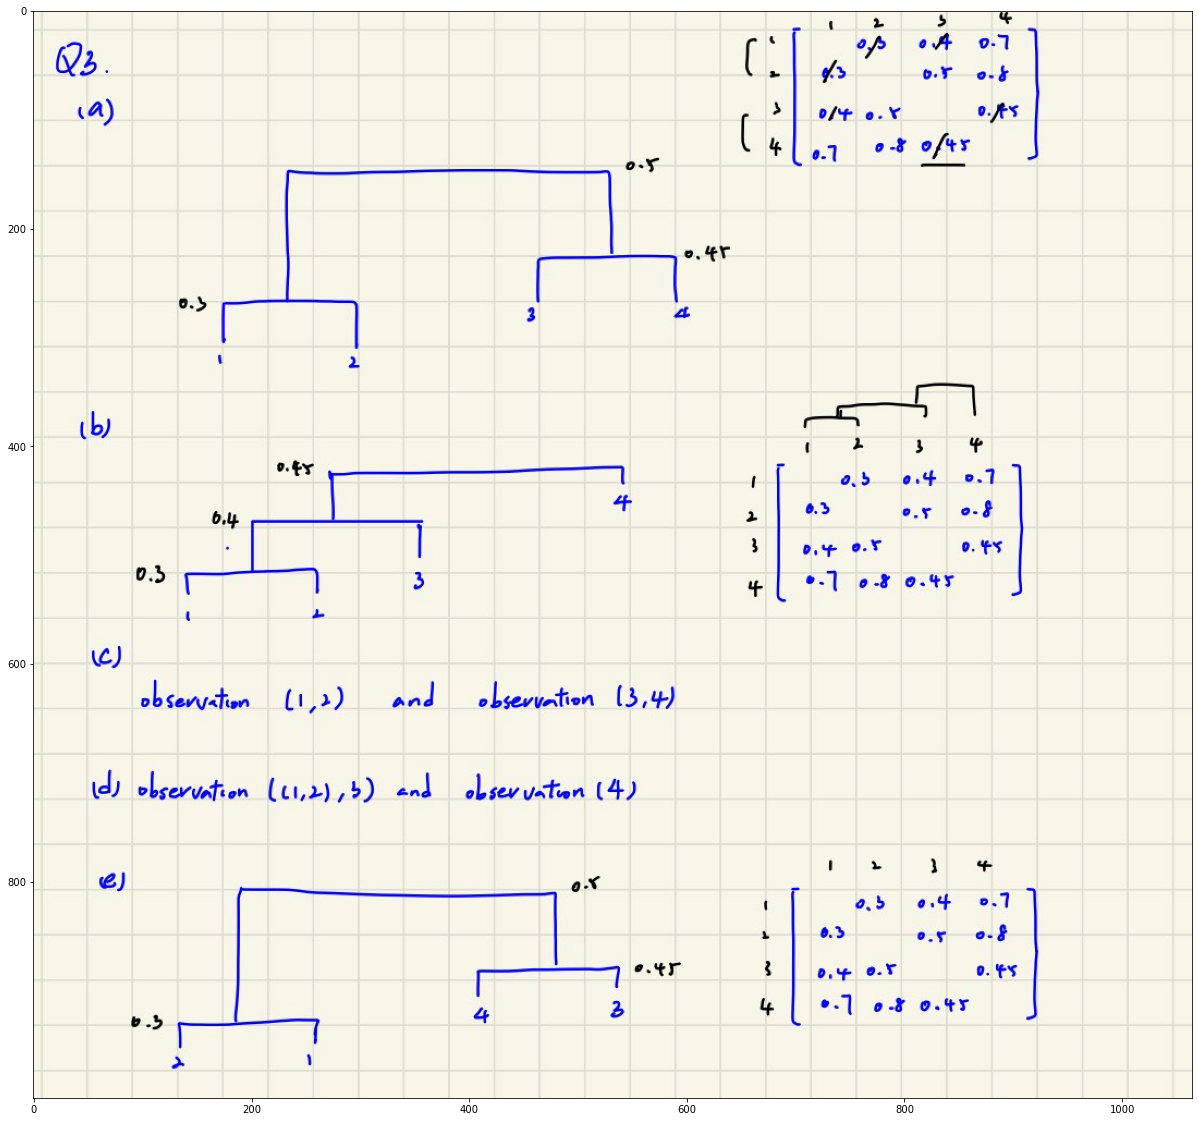

In [154]:
img=image.imread('..\\data\\hw7_q3.jpeg')
plt.figure(figsize = (50,20))

plt.imshow(img)

plt.show()